## Diagnose Cancer with Machine Learning Algos

Hey guys,

I got some data from kaggle which I played a little bit around with, to show you some of my coding. 
Please be aware that I just use this for presentation purposes in order to show you my "approach" of how I would tackle such a problem. I know that lots of my code can be improved and I am greatful for any advices.

=> Source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The task which I thought would suit most for this kind of data is to try and tell whether the cancer is benign or malignant.

I did something quite similar back in France when I was working at the Institut Universitaire de Cancer de Toulouse.

First I converted Diagnosis into true and false and then evaluated different Classification-models. I splitted my data into test and training data and I am going to hold back the validation data until I decided which model I want to be  using, to not get the Algorithm biased or overfitted. 

Thanks a lot!
Johannes

In [1]:
import pandas as pd

df = pd.read_csv("../data/Krebs/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#dropping id since we don't need that column
df.drop("id", axis =1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#turning diagnosis M (malignant) and B (benign) into true and false for better data-handling

df['diagnosis'] = df['diagnosis'] == 'M'
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#checking if diagnosis really only contains True and False values
df['diagnosis'].unique()

array([ True, False])

In [5]:
#looking at corr and deciding what to drop and what to keep

df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


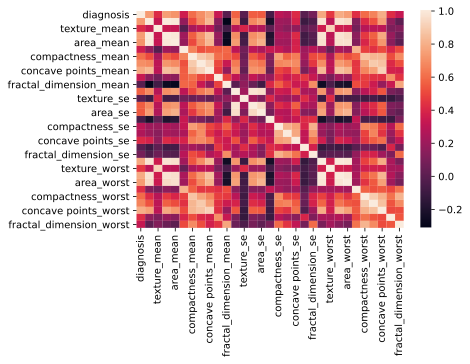

In [6]:
#drawing heatmap and using matplotlib to render heatmap as svg for better visualisation-quality
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'figure.figsize': (5.0,4.0)}

sns.heatmap(df.corr());

In [7]:
# how imbalanced is the outcome class?
# a score of 0.37 means that we have 37% malignant tumors and 63% benign tumors 
# the classes are slightly imbalanced, which I am going to ignore at this point
# rebalancing the classes could be done through resampling the dataset

import numpy as np
np.mean(df['diagnosis'])


0.37258347978910367

In [8]:
# taking the top three columns with the highest correleation to our outcome, in order to reduce dimensions
# this could make sense to see if a reduction of the amount of data has an impact on the prediction-rate 
# to improve the outcome in another step, we could also have a look at all the datasets available

df.corr()["diagnosis"].abs().sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [9]:
# running logistic Regression to get a first impression of our data
# using GridsearchCV to not manually split data

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split

#training our logisitic regression with only three parameters


X = df[['concave points_worst', 'perimeter_worst', 'concave points_mean']]
y = df["diagnosis"]

# setting the cut-off at 75% train and 25% testdata and further dividing train data to hold back the testdata
# setting random state to make sure that the data is always splitted the same way

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

#using GridsearchCV to further differentiate the training-data

modelLogisticRegression = GridSearchCV(LogisticRegression(), param_grid = {
    'max_iter': [10000]
}, cv = RepeatedKFold())

modelLogisticRegression.fit(X_train, y_train)

print(modelLogisticRegression.best_score_)
#taking model.best_score_ to compare algos

0.9016087551299589


In [10]:
#training KNN to see how it performs compared to LR

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['concave points_worst', 'perimeter_worst', 'concave points_mean']]
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

#using SC to scale data

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)

# choosing between distance metrics (Manhattan or euclidic)

modelKNN = GridSearchCV(KNeighborsClassifier(), param_grid = {
    'n_neighbors': [40, 45, 50, 60, 70, 80],
    'p': [1,2]
    
}, cv = RepeatedKFold())

modelKNN.fit(X_train_scaled, y_train)

print(modelKNN.best_score_)
print(modelKNN.best_estimator_)


0.9361477428180573
KNeighborsClassifier(n_neighbors=45)


In [11]:
# comparing Support Vector Machine to the other models 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split

X = df[['concave points_worst', 'perimeter_worst', 'concave points_mean']]
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)


# choosing between distance metrics (Manhattan or euclidic)

modelSVM = GridSearchCV(SVC(), param_grid = {
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1, 10, 15, 20, 30],
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10] }, 
    
    cv = RepeatedKFold(), n_jobs = 16)

modelSVM.fit(X_train, y_train)

print(modelSVM.best_score_)
print(modelSVM.best_estimator_)

0.9215896032831737
SVC(C=10, gamma=0.01, kernel='linear')


In [12]:
# comparing decisiontree to other models

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split

X = df[['concave points_worst', 'perimeter_worst', 'concave points_mean']]
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)


# choosing between distance metrics (Manhattan or euclidic)

modelDT = GridSearchCV(DecisionTreeClassifier(), param_grid = {
    'max_depth': range(1,20),
    'min_samples_split': [1,5,10,15,20, 25, 30] },
    
    cv = RepeatedKFold(), n_jobs = 16)

modelDT.fit(X_train, y_train)

print(modelDT.best_score_)
print(modelDT.best_estimator_)


0.9199507523939807
DecisionTreeClassifier(max_depth=4, min_samples_split=10)


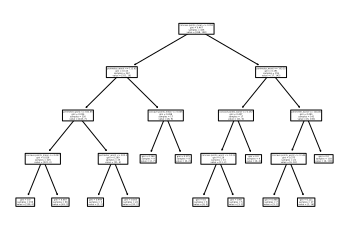

In [13]:
# plotting DecisionTree 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(modelDT.best_estimator_, feature_names = X.columns)
plt.show()

In [14]:
# comparing DecisionTree and RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split

X = df[['concave points_worst', 'perimeter_worst', 'concave points_mean']]
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)


# choosing between distance metrics (Manhattan or euclidic)

modelForest = GridSearchCV(RandomForestClassifier(), param_grid = {
    'max_depth': range(1,20),
    'min_samples_split': [1,5,10,15,20, 25, 30],
    'n_estimators': [1, 5, 10]},
    
    cv = RepeatedKFold(), n_jobs = 16)

modelForest.fit(X_train, y_train)

print(modelForest.best_score_)
print(modelForest.best_estimator_)

0.9321614227086186
RandomForestClassifier(max_depth=6, min_samples_split=20, n_estimators=5)


In [15]:
##### Deciding on DecisionTree and finally applying the algo on our validation data

modelDT.score(X_test, y_test)

0.9090909090909091